Desafio Naive Bayes realizado por Cristobal Novoa

# Desafío - Naive Bayes

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual.

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -
Naive Bayes.

Descripción

● En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de
distintos artistas. Cada uno de los csv se encuentra en la carpeta dump dentro del
proyecto.

● Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del
artista, el género musical del artista, el nombre de la canción y las letras.

● En base a esta información, se les pide un modelo generativo que pueda predecir el
género de una canción a partir de la letra de una canción.

● Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad
trabajaremos con un Multinomial Naive Bayes.

# Ejercicio 1: Preparar el ambiente de trabajo

● Importe los módulos numpy, pandas, matplotlib, seaborn, glob y os siguiendo las
buenas prácticas. Los últimos dos módulos permitirán realizar la importación de
múltiples archivos dentro de la carpeta dump.

● Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump
utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente
genere un objeto pd.DataFrame que contenga todos los csv.

● Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [1]:
# añadimos las librerías clásicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lec3_graphs as gfx
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)
import glob
import os

In [2]:
cwd = os.getcwd()#Se genera string inicial rutas
lista_csv = glob.glob(str(cwd)+'/dump/*.csv')#Se generan rutas relativas
frames = [pd.read_csv(f) for f in lista_csv]# Se lee cada csv
result = pd.concat(frames, sort = False).drop(['Unnamed: 0'], axis=1)# Se concatenan dataframes
df = pd.DataFrame(result) #Se genera dataframe 

In [3]:
df.columns # Se revisan las columnas para cambiar sus nombre

Index(['0', '1', '2', '3'], dtype='object')

In [4]:
df = df.rename(columns={'0':'artist', '1':'musical_genre', '2': 'song', '3': 'lyrics'})#Cambio de nombres

In [5]:
df.head()

,artist,musical_genre,song,lyrics
0,Iron Maiden,metal,Iron Maiden,Won't you come into my room \n I wanna show yo...
1,Iron Maiden,metal,Invasion,(Harris) \n The Vikings are coming \n You'd be...
2,Iron Maiden,metal,Prowler,"Walking through the city, looking oh so pretty..."
3,Iron Maiden,metal,Remember Tomorrow,Unchain the colours before my eyes \n Yesterda...
4,Iron Maiden,metal,Running Free,"Just sixteen, a pickup truck \n Out of money, ..."


# Ejercicio 2: Descripción de los datos

● Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman
la siguiente información:

○ La cantidad de canciones registradas por cada artista, ordenados de mayor a
menor.

○ La cantidad de canciones registradas en cada género, ordenados de mayor a
menor.

● Comente sobre las principales tendencias.

# Grafico de barra por artista

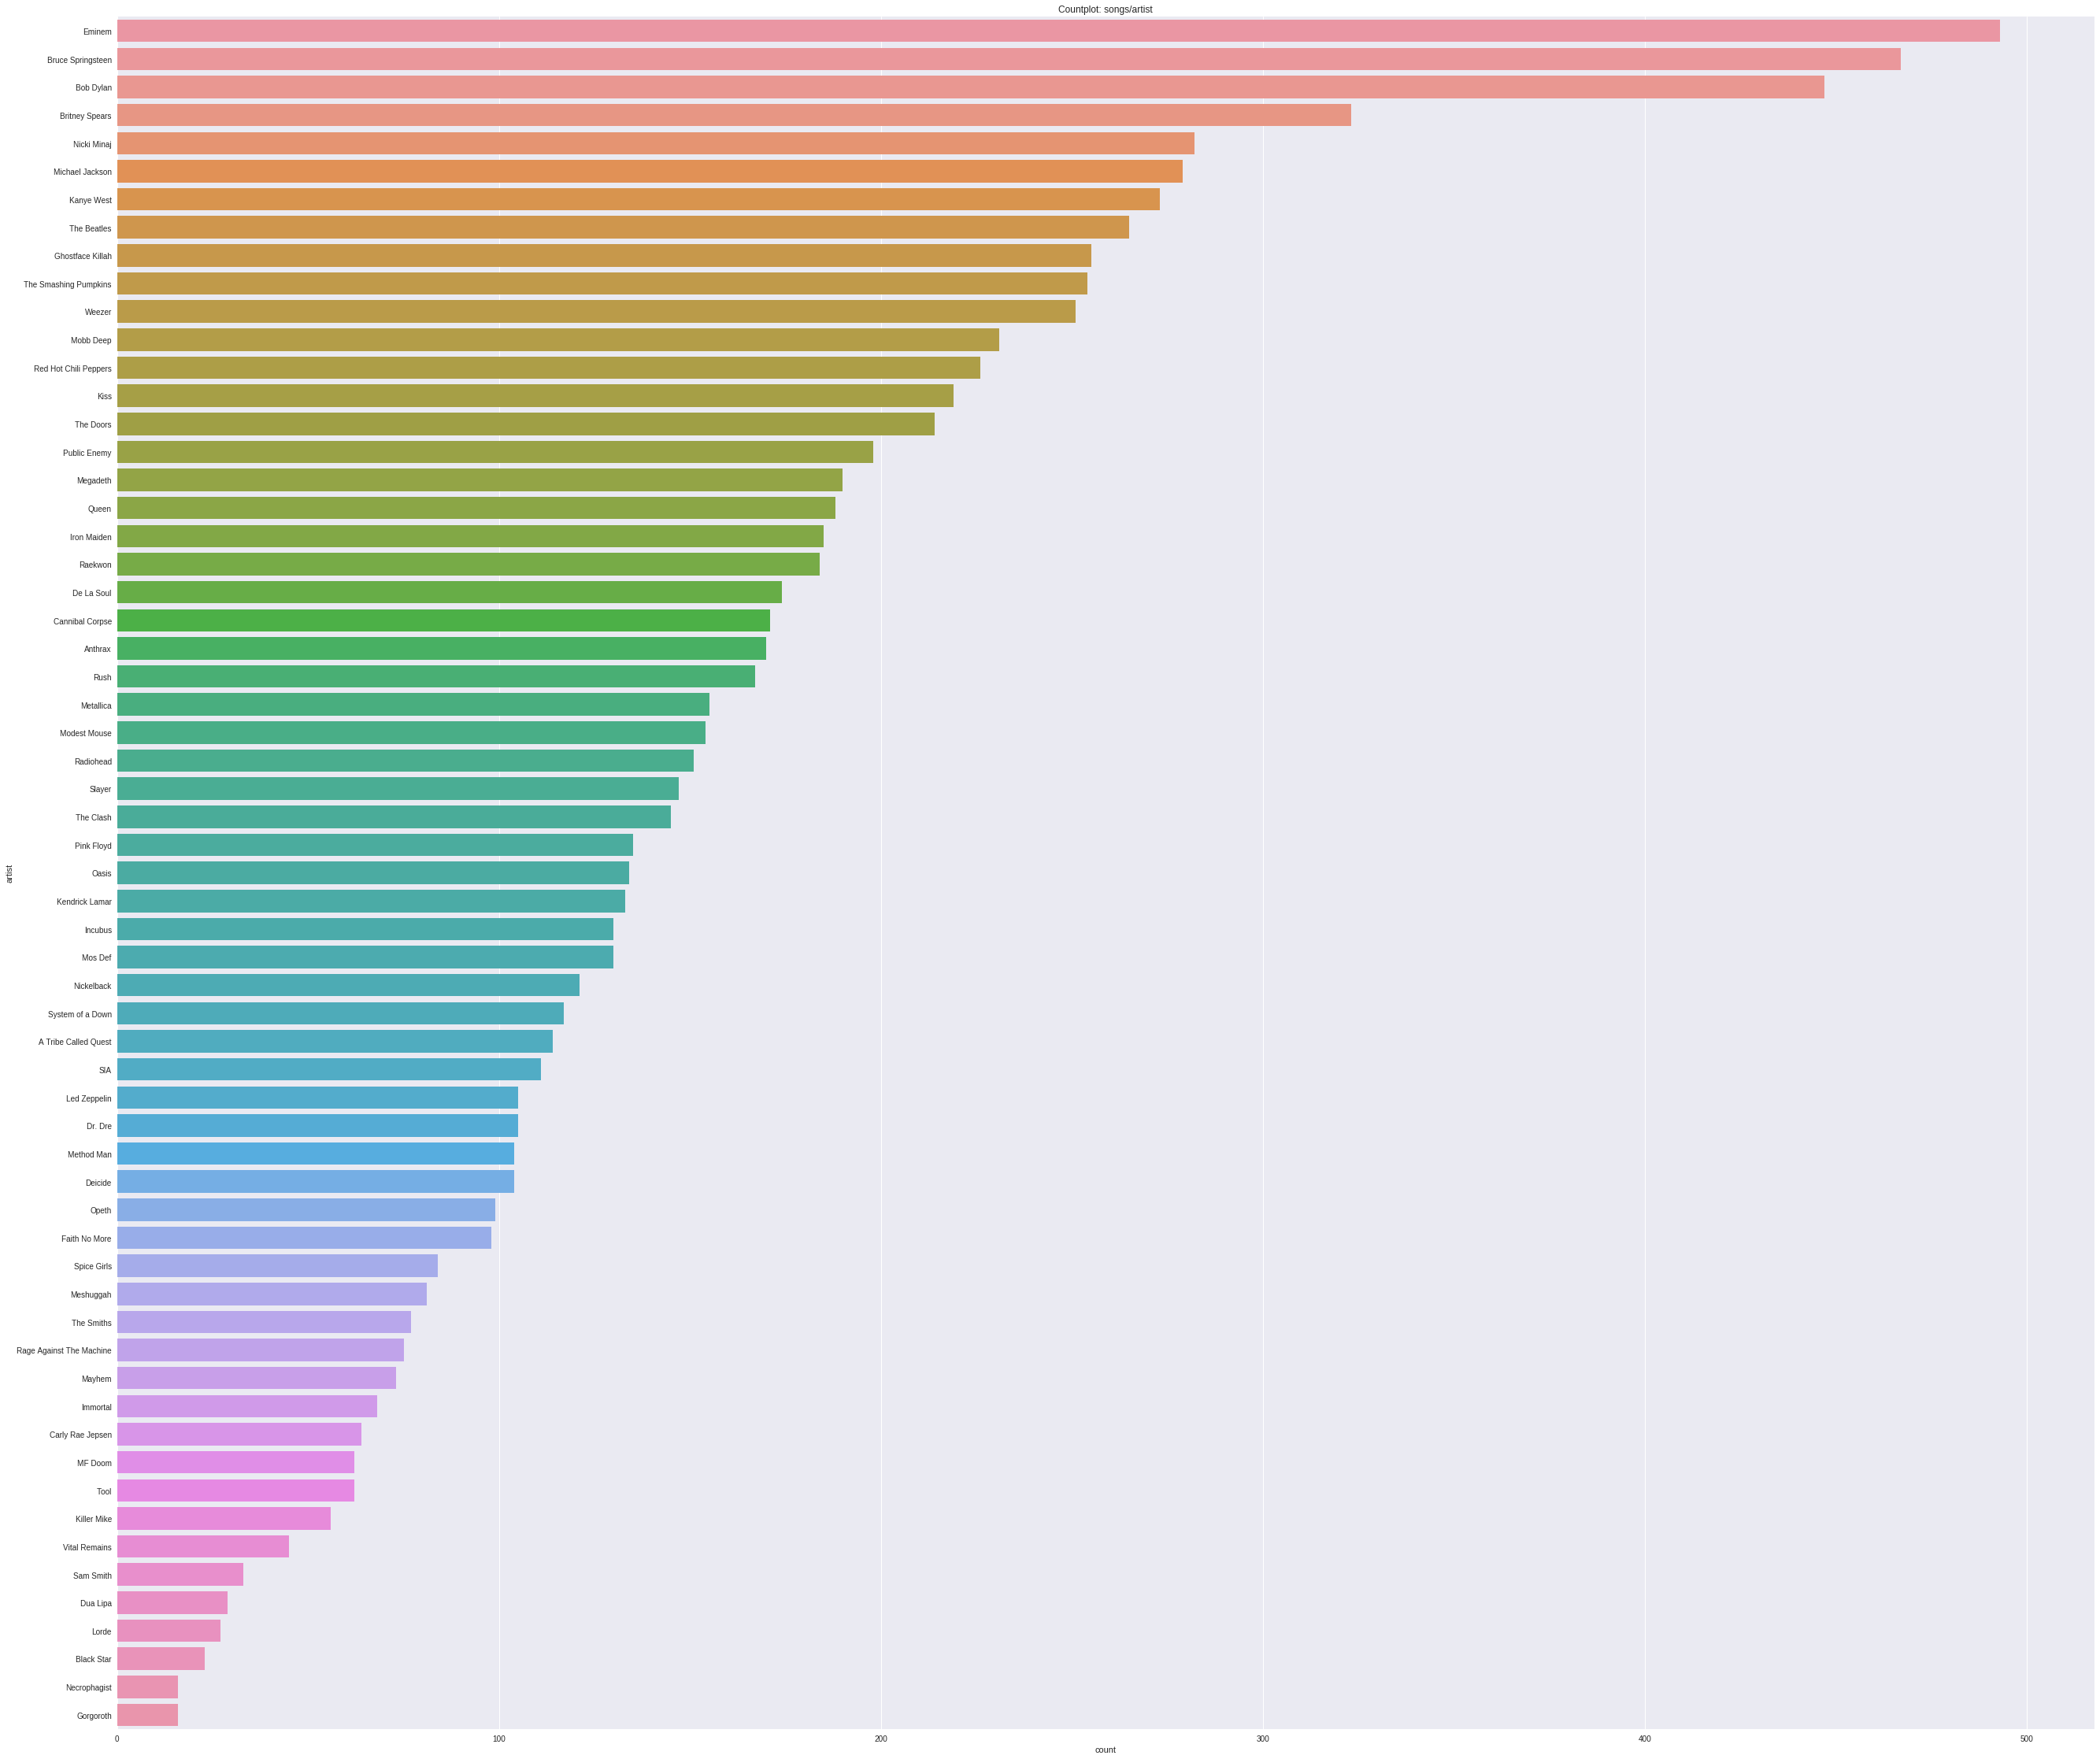

In [6]:
# Se genera grafico de barras por artista
plt.figure(figsize=(45,40))
plt.title('Countplot: songs/artist')
sns.countplot(y = 'artist', data = df, order = df['artist'].value_counts().index)

# Grafico de barras por cada genero

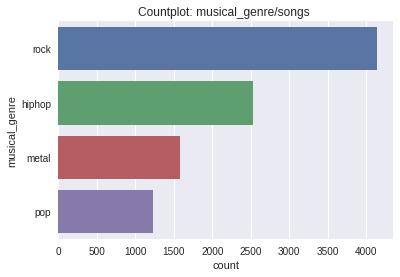

In [7]:
#Se genera grafico de barras
plt.title('Countplot: musical_genre/songs ')
sns.countplot(y = 'musical_genre', data = df, order = df['musical_genre'].value_counts().index)

La mayor cantidad de canciones son de los generos rock y hip hop. En tanto, los artistas con mayor cantidad de canciones son Eminen, Bruce Springsteen y Bob Dylan 

Ejercicio 3: Matriz de ocurrencias

Digresión: Tokenización de Textos
Para poder trabajar con textos, debemos pasarlos a una matriz dispersa, donde cada fila
representará una entrada (en este caso, una canción), y cada columna representará una
palabra (token). Este es el proceso de tokenización: Identificar la ocurrencia de una palabra
específica dentro de un conjunto de textos (corpus).

El tokenizador más simple sklearn.feature_extraction.text.CountVectorizer genera
una colección de textos a una matriz que representa la frecuencia dentro del texto de una
palabra específica.

El tokenizador funciona de la siguiente manera:

`from sklearn.feature_extraction.text import CountVectorizer`
`count_vectorizer=CountVectorizer(stop_words='english')`
`count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)`
`words = count_vectorizer.get_feature_names()`
`words_freq = count_vectorizer_fit.toarray().sum(axis=0)`

● Importe la clase CountVectorizer dentro de los módulos feature_extraction.text
de la librería sklearn. Lea la documentación asociada a ésta. ¿Cuál es el objetivo de
esta clase?

● Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.

● Genere una función que replique el procedimiento para cada uno de los géneros.

● Comente sobre las principales características de cada género en cuanto a sus palabras.

In [8]:
# Se importa el metodo CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
#Se aplica count_vectorizer para extraer las 100 palabras mas repetidas
count_vectorizer=CountVectorizer(stop_words='english', max_features = 100)
count_vectorizer_fit = count_vectorizer.fit_transform(df['lyrics'])
words = count_vectorizer.get_feature_names()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [10]:
#Se genera dataframe para para mostrar las 100 palabras mas repetidas en la base de datos
df_top_words = pd.DataFrame(data= {'freq': words_freq}, index = words)
by_freq = df_top_words.sort_values('freq',ascending = False)
by_freq.head()

,freq
like,19629
don,17398
know,14962
got,14171
just,13978


In [11]:
# Se genera funcion para ver la frecuencia de las categorias en dataframe
def freq_dataframe(dataframe, variable, group_by, category):
    df_genre = dataframe[dataframe[group_by]== category]
    count_vectorizer=CountVectorizer(stop_words='english', max_features = 100)
    count_vectorizer_fit = count_vectorizer.fit_transform(df_genre[variable])
    genre = count_vectorizer.get_feature_names()
    genre_freq = count_vectorizer_fit.toarray().sum(axis=0)
    df_top_genre = pd.DataFrame(data= {'freq': genre_freq}, index = genre)
    df_top100 = df_top_genre.sort_values('freq', ascending = False)
    return df_top100

In [12]:
#Se reportan las palabras mas usadas por categoria en lyrics dentro de musical_genre 
# hip hop
freq_dataframe(df, 'lyrics', 'musical_genre', 'hiphop' ).head(20)

,freq
like,12055
got,7613
don,7604
know,6535
just,6272
shit,5546
ain,4782
cause,4737
man,4481
yo,4425


In [13]:
#Rock
freq_dataframe(df, 'lyrics', 'musical_genre', 'rock' ).head(20)

,freq
don,5284
love,5114
know,4702
oh,4258
yeah,4157
just,4103
got,3872
ll,3825
like,3710
ve,2877


In [14]:
#Metal
freq_dataframe(df, 'lyrics', 'musical_genre', 'metal' ).head(20)

,freq
life,1233
don,1181
death,1139
time,1096
ll,1069
know,1048
just,993
blood,884
like,869
die,866


In [15]:
#Pop
freq_dataframe(df, 'lyrics', 'musical_genre', 'pop' ).head(20)

,freq
don,3329
like,2995
love,2914
oh,2737
know,2677
just,2610
yeah,2244
baby,2192
got,2156
ll,1743


El hip hop usa palabras jergales y vulgares como man, shit, nigga, fuck. 
En el caso del rock se ven palabras mas cargadas a las emociones como love, like, come, time
En el caso del metal se observan mayor cantidad de palabras con una carga emocional aun mayor que el rock que evocan generalmente la vida y la muerte como death, time, blood, die, god, dead. 
En el caso del pop se observan palabras cotidianas y emocionales como love, baby, wanna, yeah

# Ejercicio 4: Entrenamiento del Modelo

La clase Pipeline del módulo sklearn.pipeline permite concatenar múltiples pasos de
procesamiento y preprocesamiento en un estimador generado por algún método de
scikit-learn. En sí, la clase cuenta con los métodos clásicos fit, predict y score y
presenta un comportamiento idéntico a los demás objetos de scikit-learn. Uno de los usos
más comunes es para concatenar pasos de preprocesamiento con un modelo.
Componentes de un Pipeline

Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de
datos, deseo Estandarizar, posteriormente extraer sus principales componentes y finalmente
aplicar un modelo de regresión lineal. Este flujo se puede reexpresar como:

`pipeline_model = Pipeline([('scale', StandardScaler()), ('pca', RandomizedPCA(n_components=3)), ('model', LinearRegression())])`

Algunos de los elementos a considerar:

1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la
función a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por
lo que asociamos el método StandardScaler con el string scale.

2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso
representa el orden de ejecución.

Posteriormente el objeto creado puede utilizarse con los siguientes métodos

`pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(y_test)`

● Importe MultinomialNB, train_test_split, Pipeline, confusion_matrix y
classification_report.

● Genere las muestras de entrenamiento y validación reservando un 40% para validación y
declarando una semilla pseudoaleatoria.

● Monte el modelo dentro de un Pipeline, donde el primer paso es implementar
CountVectorizer y el segundo es ejecutar el clasificador MultinomialNB.

● A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones
correspondientes?

['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma
Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game
for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move
bitch, get out the way Get out the way bitch, get out the way', # Ludacris
- Move B*tch
'Sexual violence doesn't start and end with rape It starts in our books and
behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm
the one who had to learn to \
build a heart made of armor From the girl who made you soup and tied your
shoes when you were hurting\
You are not deserving, you are not deserving" #Banks - Drowning]

● Genere una predicción implementando la muestra de validación y contraste las
predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [16]:
#Se importan librerias
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
#Se identifican el vector objetivo y la matriz
vector_obj = df['musical_genre']
matriz = df['lyrics']

In [18]:
#Se separan muestras de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(matriz, vector_obj,test_size =.4, random_state=4982)

In [19]:
#Se genera pipeline con Countvectorizer y modelo multinomial
pipe = Pipeline([('vect', CountVectorizer()),('model', MultinomialNB())])
pipe_model = pipe.fit(X_train, y_train)

In [20]:
#Se generan las predicciones solicitadas
pred = ['I got a place in the underworld']
pred2 = ['As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara']
pred3 = ["Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie"]
pred4 = ['Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way']
pred5 = ['Sexual violence doesn start and end with rape It starts in our books and behind our school gates'] 
pred6 = ['Take it from the girl you claimed to love You gonna get some bad karma I the one who had to learn to \ build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\ You are not deserving, you are not deserving']

In [21]:
#Se generan las predicciones
etiqueta1 = pipe_model.predict(pred)
etiqueta2 = pipe_model.predict(pred2)
etiqueta3 = pipe_model.predict(pred3)
etiqueta4 = pipe_model.predict(pred4)
etiqueta5 = pipe_model.predict(pred5)
etiqueta6 = pipe_model.predict(pred6)

In [22]:
#Se indican las predicciones solicitadas
etiqueta1, etiqueta2, etiqueta3, etiqueta4, etiqueta5, etiqueta6

(array(['rock'], dtype='<U6'),
 array(['metal'], dtype='<U6'),
 array(['rock'], dtype='<U6'),
 array(['hiphop'], dtype='<U6'),
 array(['metal'], dtype='<U6'),
 array(['rock'], dtype='<U6'))

In [23]:
#Se predicen valores de la muestra de test
yhat = pipe_model.predict(X_test)

In [24]:
#Se genera matriz de confusion
pd.crosstab(y_test, yhat)

col_0,hiphop,metal,pop,rock
musical_genre,,,,
hiphop,919,4,30,58
metal,19,408,10,194
pop,57,1,211,219
rock,68,64,107,1427


Se observa una alta tasa de verdaderos positivos en comparacion con aquellas predicciones que fueron mal etiquetadas. 

In [25]:
#Se reportan sus metricas
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

      hiphop       0.86      0.91      0.89      1011
       metal       0.86      0.65      0.74       631
         pop       0.59      0.43      0.50       488
        rock       0.75      0.86      0.80      1666

    accuracy                           0.78      3796
   macro avg       0.77      0.71      0.73      3796
weighted avg       0.78      0.78      0.77      3796



El modelo tiene un f1-score relativamente bueno, no obstante, tiene un desempeño mediocre en la prediccion del genero pop.

# Ejercicio 5: Mejora del Modelo

● Proponga una estrategia para mejorar el desempeño del modelo en la categoría con
peores métricas.

● Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos
datos suministrados.

● Comente sobre el desempeño general de este.

Se adopta como estrategia la añadidura de nuevos datos para mejorar el desempeño de la categoria minoritaria en este caso, pop. 

In [26]:
#Se añade la nueva data con la informacion adicional
cwd2 = os.getcwd()#Se genera string inicial rutas
lista_csv2 = glob.glob(str(cwd2)+'/dump_plus_pop/*.csv')#Se generan rutas relativas
frames2 = [pd.read_csv(f) for f in lista_csv2]# Se lee cada csv
result2 = pd.concat(frames2, sort = False).drop(['Unnamed: 0'], axis=1)# Se concatenan dataframes
df2 = pd.DataFrame(result2) #Se genera dataframe 

In [27]:
#Se renombran las columnas
df2 = df2.rename(columns={'0':'artist', '1':'musical_genre', '2': 'song', '3': 'lyrics'})#Cambio de nombres

In [28]:
df2.head()

,artist,musical_genre,song,lyrics
0,Backstreet Boys,pop,We've Got It Goin' On,Everybody groove to the music \n Everybody jam...
1,Backstreet Boys,pop,Anywhere For You,I'd go anywhere for you \n Anywhere you ask me...
2,Backstreet Boys,pop,Get Down (You're The One For Me),You're the one for me \n You're my ecstasy \n ...
3,Backstreet Boys,pop,I'll Never Break Your Heart,"Baby, I know you're hurting. Right now you fee..."
4,Backstreet Boys,pop,Quit Playing Games (With My Heart),Even in my heart I see \n You're not bein' tru...


In [29]:
#Se identifican el vector objetivo y la matriz
vector_obj2 = df2['musical_genre']
matriz2 = df2['lyrics']

In [30]:
#Se separan muestras de entrenamiento y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(matriz2, vector_obj2,test_size =.4, random_state=4982)

In [31]:
#Se genera pipeline con Countvectorizer y modelo multinomial
pipe2 = Pipeline([('vect', CountVectorizer()),('model', MultinomialNB())])
pipe_model2 = pipe2.fit(X_train2, y_train2)

In [32]:
#Se predicen valores de la muestra de test
yhat2 = pipe_model2.predict(X_test2)

In [33]:
#Se genera matriz de confusion
pd.crosstab(y_test2, yhat2)

col_0,hiphop,metal,pop,rock
musical_genre,,,,
hiphop,894,6,69,36
metal,16,418,33,146
pop,81,6,740,195
rock,56,73,308,1245


La tasa de aciertos en la categoria pop aumento de forma considerable en comparacion con el modelo anterior

In [34]:
#Se reportan sus metricas
print(classification_report(y_test2, yhat2))

              precision    recall  f1-score   support

      hiphop       0.85      0.89      0.87      1005
       metal       0.83      0.68      0.75       613
         pop       0.64      0.72      0.68      1022
        rock       0.77      0.74      0.75      1682

    accuracy                           0.76      4322
   macro avg       0.77      0.76      0.76      4322
weighted avg       0.77      0.76      0.76      4322



F1-score mejoro bastante en la prediccion de pop, y en terminos generales el modelo de acuerdo a las metricas de precision y recall es muy bueno prediciendo los generos musicales en las cuatro categorias. 